In [4]:
#imports
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io
from skimage import color
from skimage import morphology
from skimage import segmentation
from skimage import util
from skimage import transform

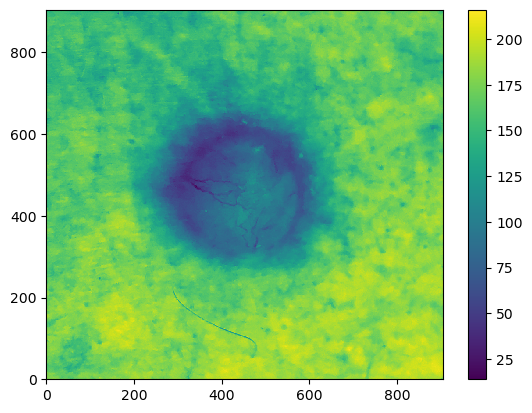

In [4]:
plt.pcolormesh(image[:,:,1])
plt.colorbar()

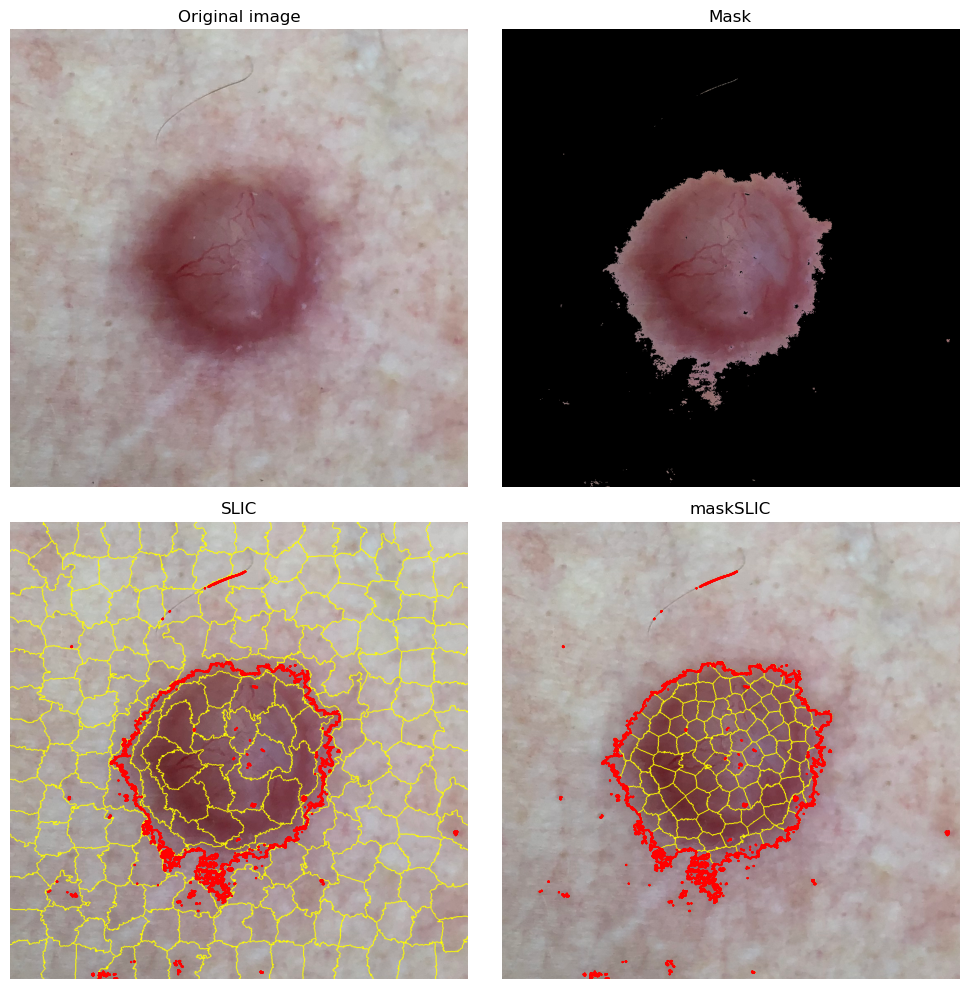

In [6]:
# Input data
if image.shape[-1] == 4:
    image = image[..., :3]

# Compute a mask
# lum = color.rgb2gray(image)
# mask = morphology.remove_small_holes(
#     morphology.remove_small_objects(
#         lum < 0.7, 500),
#     500)

# mask = morphology.opening(mask, morphology.disk(3))

# Convert the image to grayscale
image_gray = color.rgb2gray(image)

# Create a binary mask
mask = image_gray < 0.5

# Apply the mask to the image
image_masked = image.copy()
image_masked[~mask] = 0

# SLIC result
slic = segmentation.slic(image, n_segments=200, start_label=1)

# maskSLIC result
m_slic = segmentation.slic(image, n_segments=100, mask=mask, start_label=1)

# Display result
fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
ax1, ax2, ax3, ax4 = ax_arr.ravel()

ax1.imshow(image)
ax1.set_title('Original image')

ax2.imshow(image_masked, cmap='gray')
ax2.set_title('Mask')

ax3.imshow(segmentation.mark_boundaries(image, slic))
ax3.contour(mask, colors='red', linewidths=1)
ax3.set_title('SLIC')

ax4.imshow(segmentation.mark_boundaries(image, m_slic))
ax4.contour(mask, colors='red', linewidths=1)
ax4.set_title('maskSLIC')

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show()

#### Image resizing testing

In [18]:
# Define the target size
target_size = (256, 256)

# Set the path to the folder containing the images
folder_path = '/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/test_photos'

folder_path_out = '/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/test_foto_res'

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

# Loop over the image file names and resize each image
for filename in image_files:
    # Load the image from file
    image = io.imread(os.path.join(folder_path, filename))
    
    # Resize the image to the target size
    resized_image = transform.resize(image, target_size)
    
    # Save the resized image to file
    io.imsave(os.path.join(folder_path_out, 'resized_' + filename), resized_image)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [5]:
folder_path_masked = '/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/cancer/BCC_res'

image_files = [f for f in os.listdir(folder_path_masked) if f.endswith('.png')]

for filename in image_files:
    # Load the image from file
    image = io.imread(os.path.join(folder_path_masked, filename))
    
    # Remove the alpha channel
    if image.shape[-1] == 4:
        image = image[..., :3]

    # Convert the image to grayscale
    image_gray = color.rgb2gray(image)

    # Create a binary mask
    mask = image_gray < 0.5

    # Apply the mask to the image
    image_masked = image.copy()
    image_masked[~mask] = 0
    
    # Save the resized image to file
    io.imsave(os.path.join(folder_path_masked, 'masked_' + filename), image_masked)

#### Irregular streaks - spikes on the border

/var/folders/kk/clfnz3112wx7t9472q8t_bc80000gn/T/ipykernel_52457/3575112553.py:19: FutureWarning: `selem` is a deprecated argument name for `binary_opening`. It will be removed in version 1.0. Please use `footprint` instead.
  opened_image = morphology.binary_opening(binary, selem=morphology.disk(5))


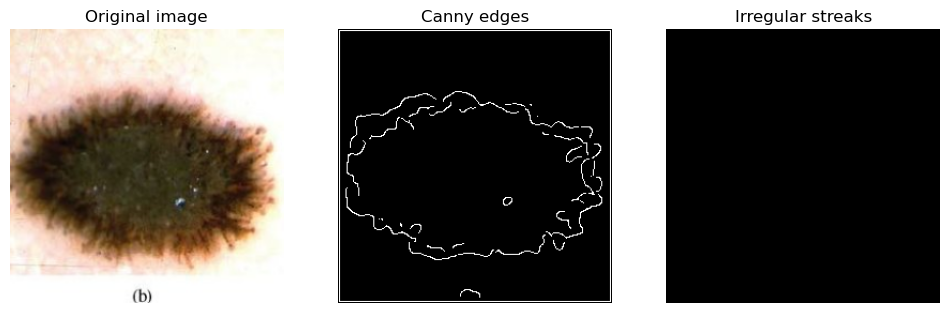

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, feature, filters, morphology, measure

# Load the image
image = io.imread('/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/test_foto_res/resized_point5_2.png')

# Convert to grayscale
gray = io.imread('/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/test_foto_res/resized_point5_2.png', as_gray=True)

# Apply Canny edge detector
edges = feature.canny(gray, sigma=3)

# Threshold the edges
thresh = filters.threshold_otsu(edges)
binary = edges > thresh

# Remove small objects
opened_image = morphology.binary_opening(binary, selem=morphology.disk(5))

# Extract the irregular streaks feature
label_image = morphology.label(opened_image)
props = measure.regionprops(label_image)
irregular_streaks = np.zeros_like(binary)
for prop in props:
    if prop.area > 1000 and prop.perimeter > 500:
        irregular_streaks += (label_image == prop.label)

# Display the results
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))
ax[0].imshow(image)
ax[1].imshow(edges, cmap='gray')
ax[2].imshow(irregular_streaks, cmap='gray')
ax[0].set_title('Original image')
ax[1].set_title('Canny edges')
ax[2].set_title('Irregular streaks')
for a in ax:
    a.axis('off')
plt.show()


Better irregular streaks?

244
Border pixels 244
Streak pixels 244
1.0
No irregular streaks detected.


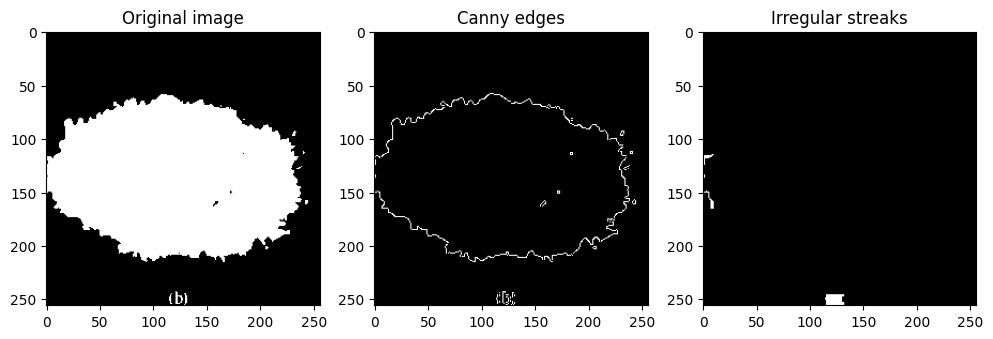

In [5]:
import cv2
import numpy as np
#np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt

# Load the skin lesion image
img = cv2.imread('/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/test_foto_res/mask_resized_point5_2.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection to extract edges
edges = cv2.Canny(gray, 75, 200) # increase second parameter to detect more edges, increase third argument for less edges detected 

# Apply thresholding to extract irregular streaks on the borders
_, thresh = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((5,5), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
border_mask = np.zeros_like(thresh)
border_mask[:10, :] = 1 #You can adjust the size of the border mask by changing the size of the slices used to assign 1 to the border mask.
border_mask[-10:, :] = 1
border_mask[:, :10] = 1
border_mask[:, -10:] = 1
border = cv2.bitwise_and(thresh, border_mask)
#print(np.sum(border))
# Compute the percentage of pixels in the border that belong to irregular streaks
border_pixels = np.sum(border != 0)
streak_pixels = np.sum(border == 1)
streak_percentage = streak_pixels / border_pixels
print("Border pixels", border_pixels)
print("Streak pixels", streak_pixels)
print(streak_percentage)
# Display the result
if streak_percentage > 1: #values between 1 and 0.01 since is a %. You can adjust this value to make the detection more or less sensitive, depending on the characteristics of your images.
    print("Irregular streaks detected!")
    output = 1
else:
    print("No irregular streaks detected.")
    output = 0

# Plot the images
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(img[:,:,::-1])
ax[0].set_title("Original image")
ax[1].imshow(edges, cmap='gray')
ax[1].set_title("Canny edges")
ax[2].imshow(border, cmap='gray')
ax[2].set_title("Irregular streaks")
plt.show()


In [13]:
#used this to detected the irregular edges
#https://www.sciencedirect.com/science/article/abs/pii/089561119290074J?via%3Dihub

import cv2

# Load image
img = cv2.imread('/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/test_foto_res/mask_resized_point5_2.png')

# Convert to grayscale and apply threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
        cv2.THRESH_BINARY,11,2)

# Find contours in the image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Compute area of the skin lesion
lesion_area = cv2.contourArea(contours[0])

# Compute perimeter of the border
border_perimeter = cv2.arcLength(contours[0], True)

print('Lesion area:', lesion_area)
print('Border perimeter:', border_perimeter)

irregularity = (border_perimeter ** 2) / 4 * np.pi * lesion_area
print('Irregularity:', irregularity)
threshold = 150
if irregularity > threshold:
    print('Irregular streaks detected!')
else:
    print('No irregular streaks detected.')

Lesion area: 7.5
Border perimeter: 23.071067690849304
Irregularity: 3135.353633552505
Irregular streaks detected!


Regression structures - scar-like white/blue areas on the lesion


In [15]:
import cv2
import numpy as np
from skimage.segmentation import slic
from skimage.color import label2rgb

# Load the image
img = cv2.imread("/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/test_foto_res/resized_point7.png")

# Convert to LAB color space
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Perform SLIC segmentation
segments = slic(img_lab, n_segments=100, compactness=10)

# Create a color image with segment boundaries
segment_edges = np.zeros_like(img)
for i in np.unique(segments):
    mask = segments == i
    segment_edges = cv2.cvtColor(mask.astype(np.uint8)*255, cv2.COLOR_GRAY2BGR)

# Display the original image and the segmentation result
overlay = label2rgb(segments, img, kind='avg')
result = cv2.addWeighted(img, 0.5, overlay, 0.5, 0)
cv2.imshow("Original Image", img)
cv2.imshow("Segmentation Result", result)
cv2.imshow("Segment Boundaries", segment_edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [1]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/test_photos/point7_cmask.png')

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds of the scar-like white/blue color
lower_color = np.array([0, 0, 150])
upper_color = np.array([180, 30, 255])

# Create a mask using the defined color bounds
mask = cv2.inRange(hsv_img, lower_color, upper_color)

# Apply the mask to the image
masked_img = cv2.bitwise_and(img, img, mask=mask)

# Display the original image and the masked image side by side
cv2.imshow('Original Image', img)
cv2.imshow('Masked Image', masked_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


: 

In [ ]:
# Irregular pigmentation detection
# Load the skin lesion image
image = cv2.imread('PAT_759_1538_566_step3.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLORBGR2GRAY)

# Apply a threshold to create a binary mask of the lesion area
binary_mask = cv2.threshold(gray_image, 10, 255, cv2.THRESHBINARY)

# Find contours in the binary mask to get the bounding box of the lesion
contours,  = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(contours[0])

# Create a mask for the lesion area
lesion_mask = np.zeros_like(binary_mask)
lesion_mask[y:y+h, x:x+w] = 255

# Apply the lesion mask to the grayscale image
masked_gray_image = cv2.bitwise_and(gray_image, lesion_mask)

# Apply edge detection using the Canny algorithm
edges = cv2.Canny(masked_gray_image, 50, 150)

# Find contours in the edge image
contours,  = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image
result = image.copy()

# Iterate through the contours and draw them on the result image
cv2.drawContours(result, contours, -1, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Irregular Pigmentation Detection (Inside Lesion Area)')
plt.axis('off')

plt.show()

In [ ]:
# Atyical network detection
# Load the skin lesion image
image = cv2.imread('PAT_1842_3615_850_step3.jpg')

# Convert the image to the LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Extract the L, A, and B channels from the LAB image
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Apply contrast stretching to enhance the L channel
enhanced_l_channel = cv2.equalizeHist(l_channel)

# Perform thresholding on the enhanced L channel to obtain a binary mask
binary_mask = cv2.threshold(enhanced_l_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply morphological operations to remove noise and refine the binary mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
morphological_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)

# Convert the morphological mask to a color image
color_mask = cv2.cvtColor(morphological_mask, cv2.COLOR_GRAY2BGR)

# Combine the color mask with the original image to highlight the regions of interest
result = cv2.bitwise_and(image, color_mask)

# Display the result
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Atypical Pigment Network Detection')
plt.axis('off')

plt.show()

In [3]:
import functions
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

images = load_images_from_folder('/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/Masks/Color_mask/Training/')

for i in images:
    print(functions.measure_blue_veil(i))
    

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [2]:
def generate_sets():
    sets = [[]]  # Start with an empty set
    for num in range(1, 8):  # Iterate over numbers from 1 to 7
        new_sets = []  # Stores new sets for the current number
        for subset in sets:
            new_subset = subset + [num]  # Add the current number to each existing set
            new_sets.append(new_subset)  # Add the new set to the list of generated sets
        sets.extend(new_sets)  # Add the new sets to the existing sets
    return sets

sets = generate_sets()
for subset in sets:
    #print(subset)
    print(len(subset))


0
1
1
2
1
2
2
3
1
2
2
3
2
3
3
4
1
2
2
3
2
3
3
4
2
3
3
4
3
4
4
5
1
2
2
3
2
3
3
4
2
3
3
4
3
4
4
5
2
3
3
4
3
4
4
5
3
4
4
5
4
5
5
6
1
2
2
3
2
3
3
4
2
3
3
4
3
4
4
5
2
3
3
4
3
4
4
5
3
4
4
5
4
5
5
6
2
3
3
4
3
4
4
5
3
4
4
5
4
5
5
6
3
4
4
5
4
5
5
6
4
5
5
6
5
6
6
7


In [6]:
import os
import glob
import cv2
def measure_streaks(image): #feature 5, returns a formula
    # Convert to grayscale and apply threshold
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

    # Find contours in the image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Compute area of the skin lesion
    lesion_area = cv2.contourArea(contours[0])

    # Compute perimeter of the border
    border_perimeter = cv2.arcLength(contours[0], True)

    #print('Lesion area:', lesion_area)
    #print('Border perimeter:', border_perimeter)

    irregularity = (border_perimeter ** 2) / 4 * np.pi * lesion_area
    #print('Irregularity:', irregularity)
    
    #return irregularity
    
    threshold = 2000
    if irregularity > threshold:
        return 1
    else:
        return 0

# Specify the folder path where the images are located
folder_path = "/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/cancer"

directory1 = r"/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/cancer"
#directory2 = r"/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/no_cancer"

# Lists to store the results
regression = []
#no_regression= []

# Function to process a directory
def process_directory(directory, results):
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a picture
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the picture
            picture_path = os.path.join(directory, filename)
            picture = cv2.imread(picture_path)

            # Process the picture using measure_blue_veil function
            result = measure_streaks(picture)

            # Append the result to the list
            results.append(result)

# Process the first directory
process_directory(directory1, regression)


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'
